
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## The Data

**Download the fashion mnist dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


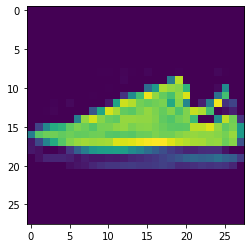

In [6]:
plt.imshow(x_train[6])

In [7]:
y_train[6]

7

In [8]:
classes[7]

'Sneaker'

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

**Reshape the X into 4 dimension**

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [14]:
x_test = x_test.reshape(10000,28,28,1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train)

In [18]:
y_cat_test = to_categorical(y_test)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [20]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [21]:
from tensorflow.keras.callbacks import EarlyStopping 

In [22]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3)

In [23]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 127s 67ms/step - loss: 0.4021 - accuracy: 0.8600 - val_loss: 0.3322 - val_accuracy: 0.8868
Epoch 2/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.3063 - accuracy: 0.8947 - val_loss: 0.3064 - val_accuracy: 0.8921
Epoch 3/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.2913 - accuracy: 0.9003 - val_loss: 0.3187 - val_accuracy: 0.8893
Epoch 4/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.2878 - accuracy: 0.9021 - val_loss: 0.3217 - val_accuracy: 0.8974
Epoch 5/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.2811 - accuracy: 0.9050 - val_loss: 0.3234 - val_accuracy: 0.8889
Epoch 6/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.2826 - accuracy: 0.9027 - val_loss: 0.3652 - val_accuracy: 0.8823
Epoch 7/10
1875/1875 [==============================] - 119s 64ms/step - loss: 0.2772 - accuracy: 0.9048 - val_loss: 0

**Plot values of metrics you used in your model.**

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()


,loss,accuracy,val_loss,val_accuracy
0,0.402114,0.860000,0.332217,0.8868
1,0.306317,0.894667,0.306402,0.8921
2,0.291340,0.900300,0.318671,0.8893
3,0.287767,0.902083,0.321676,0.8974
4,0.281055,0.904983,0.323431,0.8889


**Plot values of metrics you used in your model.**

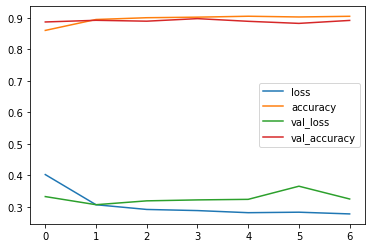

In [25]:
loss_df.plot();

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.3246 - accuracy: 0.8917


[0.3245585858821869, 0.891700029373169]

In [28]:
from sklearn.metrics import classification_report

In [29]:
predictions = model.predict(x_test)
predictions

array([[9.9944968e-09, 8.4999974e-10, 1.2817318e-07, ..., 3.5296590e-04,
        4.7992530e-06, 9.9751496e-01],
       [5.6268956e-08, 8.6749476e-21, 1.0000000e+00, ..., 2.0098501e-13,
        4.4699127e-13, 5.4960860e-16],
       [8.0318870e-08, 9.9999988e-01, 2.0147464e-10, ..., 1.3362452e-11,
        2.1797293e-09, 3.2087336e-11],
       ...,
       [1.5733555e-08, 1.0803063e-21, 1.4841104e-11, ..., 1.8566389e-13,
        1.0000000e+00, 2.9302745e-15],
       [4.8787018e-07, 9.9999416e-01, 8.2748075e-09, ..., 3.1123393e-10,
        4.8390707e-08, 1.5829878e-08],
       [1.8396187e-03, 1.4180252e-05, 2.3280533e-02, ..., 1.6870950e-01,
        2.7619449e-02, 5.3556114e-02]], dtype=float32)

In [30]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [31]:
y_cat_test.shape

(10000, 10)

In [32]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.88      0.81      1000
           3       0.85      0.93      0.89      1000
           4       0.88      0.76      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.64      0.69      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [36]:
classes[6]  # which has the worst f1 score

'Shirt'

# Prediction

In [37]:
samples=[x_test[19],x_test[15],x_test[12],x_test[14]]

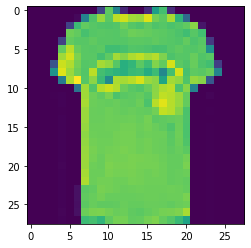

In [38]:
plt.imshow(samples[0])

In [40]:
# samples[0]

In [41]:
img=samples[0]
img.shape

(28, 28, 1)

In [42]:
type(img)

numpy.ndarray

In [43]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [44]:
model.predict(resized_img)

array([[9.9562907e-01, 6.5810184e-09, 1.4060511e-05, 2.3911849e-05,
        5.4912999e-09, 4.2055039e-08, 4.3278704e-03, 8.9787484e-09,
        4.9728442e-06, 1.7197207e-09]], dtype=float32)

In [45]:
np.argmax(model.predict(resized_img))

0

In [46]:
classes[0]

'T-shirt/top'

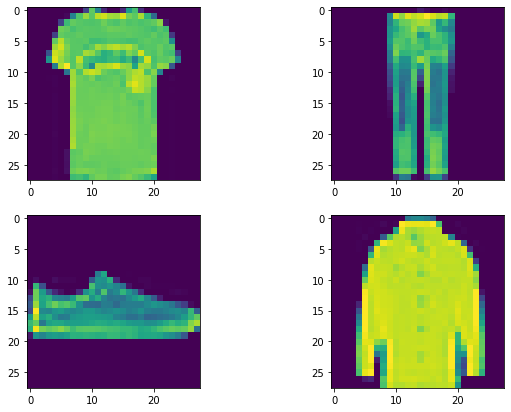

In [74]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(samples[0])
fig.add_subplot(rows, columns, 2)
plt.imshow(samples[1])
fig.add_subplot(rows, columns, 3)
plt.imshow(samples[2])
fig.add_subplot(rows, columns, 4)
plt.imshow(samples[3])

In [47]:
for img in samples:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(resized_img))]}\n")

T-shirt/top    0.996
Trouser        0.000
Pullover       0.000
Dress          0.000
Coat           0.000
Sandal         0.000
Shirt          0.004
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : T-shirt/top

T-shirt/top    0.000
Trouser        0.999
Pullover       0.000
Dress          0.000
Coat           0.000
Sandal         0.000
Shirt          0.000
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : Trouser

T-shirt/top    0.000
Trouser        0.000
Pullover       0.000
Dress          0.000
Coat           0.000
Sandal         0.210
Shirt          0.000
Sneaker        0.562
Bag            0.227
Ankle boot     0.000
dtype: float32
predicted class is : Sneaker

T-shirt/top    0.000
Trouser        0.000
Pullover       0.291
Dress          0.000
Coat           0.706
Sandal         0.000
Shirt          0.003
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predic

### new image to predict

In [78]:
from tensorflow.keras.preprocessing import image
imgGray = image.load_img("black.jpg", target_size=(28, 28))
print (np.array(imgGray).shape)
imgGray

(28, 28, 3)


In [79]:
import tensorflow as tf
imgGray = tf.image.rgb_to_grayscale(imgGray)

In [51]:
# imgGray

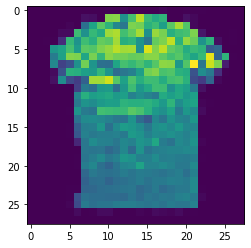

In [80]:
plt.imshow(imgGray)

In [81]:
np.array(imgGray).min(), np.array(imgGray).max()

(0, 136)

In [82]:
imgGray = imgGray/255
imgGray.shape

TensorShape([28, 28, 1])

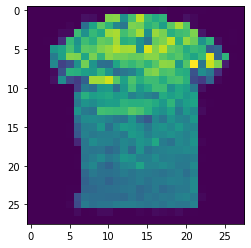

In [83]:
plt.imshow(imgGray)

In [84]:
imgGray = np.array(imgGray)
imgGray.shape

(28, 28, 1)

In [85]:
imgGray= np.expand_dims(imgGray, axis=0)
imgGray.shape

(1, 28, 28, 1)

In [86]:
# imgGray = imgGray[None,:,:,:] # same process to add dimension without a function
# imgGray.shape

In [87]:
pd.Series(model.predict(imgGray).round(3).flatten())#.argmax()

0    0.443
1    0.053
2    0.058
3    0.128
4    0.031
5    0.001
6    0.264
7    0.000
8    0.020
9    0.002
dtype: float32

In [89]:
pd.Series(model.predict(imgGray).round(3).flatten()).argmax()

0

## The model predicted the image as T-shirt which its prediction possibility is 0.443

In [90]:
classes[0]

'T-shirt/top'

In [88]:
pd.Series(classes)

0    T-shirt/top
1        Trouser
2       Pullover
3          Dress
4           Coat
5         Sandal
6          Shirt
7        Sneaker
8            Bag
9     Ankle boot
dtype: object